# Signal to noise ratio computation

We will use python tools to estimate the signal to noise ratio for:
- A damped sine wave with random noise
- TEC series from:
  - Chelyabinsk data
  - Venezolan meteor data (USG-09)

## Damped sine wave with random noise

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd

In [90]:
def signaltonoise(signal, ddof=0):
    """
    Since scipy.stats.signaltonoise only exists in older versions of 
    scipy, we will improvise a function where computes the mean of the
    signal divided by the standard deviation
    Inputs:
    signal --> the input array. 
    ddof: int. degrees of freedom of standard deviation
    output: float. Signal to noise
    """
    max_signal = np.max(signal)
    min_signal = np.abs(np.min(signal))
    peak = float(np.where(max_signal>min_signal, max_signal, min_signal))
    rms = peak/np.sqrt(2.)
    stddev = np.std(signal, ddof=ddof)
    return np.where(stddev==0, 0, np.abs(rms/stddev))

In [91]:
t = np.linspace(0, 10)

In [92]:
sns.set_style("whitegrid")

In [93]:
2.*np.random.rand(len(t))

array([0.01890978, 1.16921449, 0.90344783, 0.89750471, 1.22463094,
       0.77738504, 0.71129439, 0.49732652, 0.72830568, 1.03799729,
       1.36024376, 0.17110943, 1.45231022, 1.54418902, 0.03012907,
       1.25314884, 1.82591279, 0.73532332, 0.61034182, 1.01510797,
       1.14175358, 1.97889679, 0.31443916, 1.73789831, 1.18909699,
       0.30959676, 1.42252385, 1.53277564, 0.6189134 , 0.82814001,
       1.18211138, 0.15179174, 0.23406243, 0.59582369, 0.83368792,
       0.90644802, 1.17123499, 0.73688242, 0.29382976, 0.4564384 ,
       0.71453096, 0.84676641, 0.55408767, 0.49438134, 1.74716269,
       1.64501026, 0.11189342, 0.4681732 , 1.89506825, 0.37888909])

Text(0.1, -2.3, 'S/N=2.74')

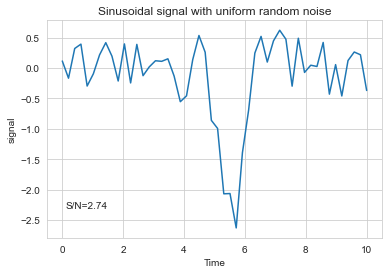

In [94]:
s = 2/np.sqrt(3.)*(np.sin(t)+np.sin(2*t)+np.sin(3*t))*np.exp(-0.5*(t-5)**2) + (np.random.rand(len(t))-0.5)
plt.plot(t, s)
plt.xlabel("Time")
plt.ylabel("signal")
plt.title("Sinusoidal signal with uniform random noise")
plt.text(0.1, -2.3, "S/N={:.2f}".format(signaltonoise(s)))

## Now try with TEC data

### Import data of Chelyabinsk event PRN 18

In [95]:
ch_PRN18 = pd.read_csv("chelyabinsk_PRN18.csv")

In [96]:
ch_PRN18.keys()

Index(['Time', 'TEC'], dtype='object')

Text(2.5, -0.5, 'S/N=2.63')

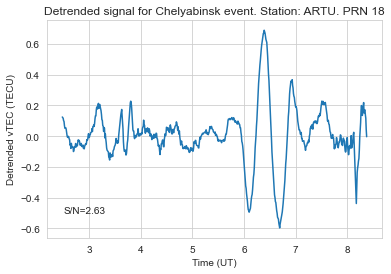

In [97]:
plt.plot(ch_PRN18["Time"], ch_PRN18["TEC"])
plt.xlabel("Time (UT)")
plt.ylabel("Detrended vTEC (TECU)")
plt.title("Detrended signal for Chelyabinsk event. Station: ARTU. PRN 18")
plt.text(2.5, -0.5, "S/N={:.2f}".format(signaltonoise(ch_PRN18["TEC"])))

### Import data for Chelyabinsk event previous day

In [98]:
ch_PRN18_previous = pd.read_csv("chelyabinsk_PRN18_previous.csv")

In [99]:
ch_PRN18_previous.keys()

Index(['Time', 'TEC'], dtype='object')

(-0.6, 0.6)

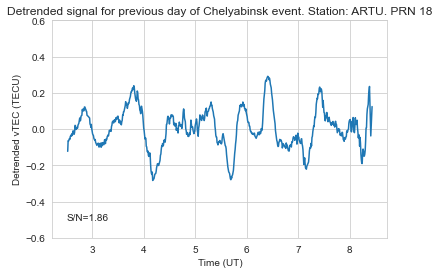

In [100]:
plt.plot(ch_PRN18_previous["Time"], ch_PRN18_previous["TEC"])
plt.xlabel("Time (UT)")
plt.ylabel("Detrended vTEC (TECU)")
plt.title("Detrended signal for previous day of Chelyabinsk event. Station: ARTU. PRN 18")
plt.text(2.5, -0.5, "S/N={:.2f}".format(signaltonoise(ch_PRN18_previous["TEC"])))
plt.ylim(-0.6, 0.6)

In [77]:
print(max(ch_PRN18_previous["TEC"]),np.abs(min(ch_PRN18_previous["TEC"])))

0.2914515941491515 0.2836055568282862


In [87]:
max_signal = np.max(ch_PRN18_previous["TEC"])
min_signal = np.abs(np.min(ch_PRN18_previous["TEC"]))
peak = np.where(max_signal>min_signal, max_signal, min_signal)
rms = peak/np.sqrt(2.)
rms

0.20608739861049452

In [101]:
sd=np.std(ch_PRN18_previous["TEC"],ddof=0)
sd

0.11106776889774671

In [89]:
rms/sd

1.8555103848374461

maybe I need a best definition of signal to noise ratio, since as I have defined it, its value is always above 1